# Pandas and EDA II

In this notebook, we will extend our use of the Pandas library in exploring datasets.  We want to add the ability to filter and subset data based on logical criteria.  


**OBJECTIVES**:

- Load data using `Pandas` in a variety of formats.
- Describe data types and explain characteristics of data set at a descriptive level
- Subset rows and columns based on numerical features
- Subset rows and columns based on categorical features


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
occ = pd.read_csv('data/eda_data/occupations.csv')

In [6]:
occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [7]:
occ.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [8]:
occ.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [9]:
occ.head(10)

user_id  age gender     occupation zip_code
0        1   24      M     technician    85711
1        2   53      F          other    94043
2        3   23      M         writer    32067
3        4   24      M     technician    43537
4        5   33      F          other    15213
5        6   42      M      executive    98101
6        7   57      M  administrator    91344
7        8   36      M  administrator    05201
8        9   29      M        student    01002
9       10   53      M         lawyer    90703

In [26]:
#we do not want zip codes to be objects, ints
pd.to_numeric(occ.zip_codes)

AttributeError: 'DataFrame' object has no attribute 'zip_codes'

In [25]:
occ.iloc[73]

user_id              74
age                  39
gender                M
occupation    scientist
zip_code          T8H1N
Name: 73, dtype: object

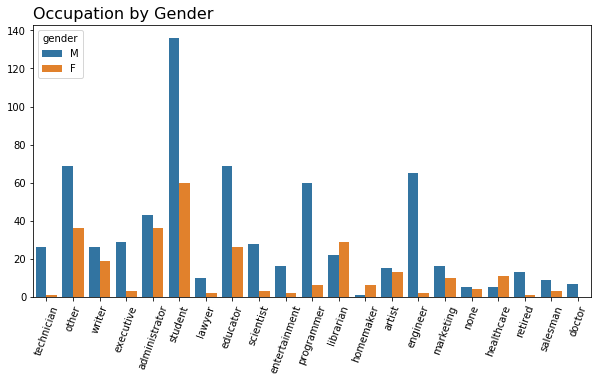

In [10]:
plt.figure(figsize = (10, 5))
sns.countplot(occ.occupation, hue = occ.gender)
plt.xticks(rotation = 70)
plt.xlabel('')
plt.ylabel('')
plt.title('Occupation by Gender', loc = 'left', fontsize = 16);

### Filtering Data

Now, we will examine how to filter data in a way that returns a `DataFrame`.  This means that once filtered, we can apply our usual operations including plots.  For example, suppose we wanted to look at just the librarians.  We can see whether or not this is true, and then we can apply this as a mask to our original `DataFrame`, creating a subset of the original data as a `DataFrame`.

In [11]:
#this means the first ten rows of our datafram do not contain librarians
(occ.occupation == 'librarian').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: occupation, dtype: bool

In [12]:
#see the top of a subset dataframe
occ[occ.occupation == 'librarian'].head()

user_id  age gender occupation zip_code
18       19   40      M  librarian    02138
26       27   40      F  librarian    30030
42       43   29      F  librarian    20854
55       56   25      M  librarian    46260
87       88   49      F  librarian    11701

In [13]:
#save this as a new dataframe named librarians
librarians = occ[occ.occupation == 'librarian']

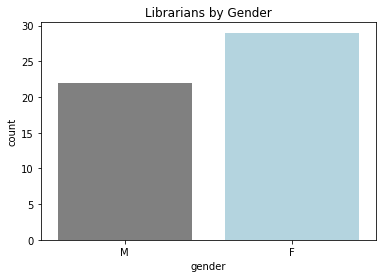

In [14]:
#use the dataframe just like we have before
sns.countplot(librarians.gender, palette=['grey', 'lightblue'])
plt.title('Librarians by Gender');

### Logical Combinations

At a higher level, we are using comparisons to create subsets of our original data.  In Python we have the following comparison syntax:

- `>`: Greater Than
- `<`: Less Than
- `>=`: Greater Than or Equal To
- `<=`: Less than or Equal To
- `==`: Congruent
- `!=`: Not Equal To

We can combine these operations with **and**/**or** operations.  For example if we wanted librarians who were under the age of 40, we want:

```python
occupation == 'librarian'
age < 40
```

This would be put together with the **and** operation, implemented with `&`. 

In [15]:
occ[(occ.occupation == 'librarian' ) & (occ.age < 40)].head()

user_id  age gender occupation zip_code
42        43   29      F  librarian    20854
55        56   25      M  librarian    46260
183      184   37      M  librarian    76013
213      214   26      F  librarian    11231
219      220   30      M  librarian    78205

In [27]:
young_librarians = (occ.occupation == 'librarian' ) & (occ.age < 40)

In [28]:
occ[young_librarians].head()

user_id  age gender occupation zip_code
42        43   29      F  librarian    20854
55        56   25      M  librarian    46260
183      184   37      M  librarian    76013
213      214   26      F  librarian    11231
219      220   30      M  librarian    78205

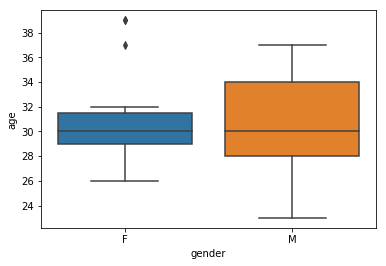

In [18]:
sns.boxplot( occ[young_librarians].gender, occ[young_librarians].age)

In [19]:
occ[young_librarians].groupby('gender').describe()

age                                                    user_id  \
       count       mean       std   min   25%   50%   75%   max   count   
gender                                                                    
F       15.0  31.000000  4.157609  26.0  29.0  30.0  31.5  39.0    15.0   
M       11.0  30.545455  4.367233  23.0  28.0  30.0  34.0  37.0    11.0   

                                                                  
              mean         std   min    25%    50%    75%    max  
gender                                                            
F       394.133333  239.321621  43.0  261.0  338.0  458.5  895.0  
M       518.363636  288.615756  56.0  277.0  527.0  797.0  843.0

In [20]:
occ.groupby(['occupation', 'gender']).describe()[:10]

age                                                  \
                     count       mean        std   min    25%   50%    75%   
occupation    gender                                                         
administrator F       36.0  40.638889  10.602298  22.0  33.00  38.5  49.25   
              M       43.0  37.162791  11.422472  21.0  28.00  35.0  46.50   
artist        F       13.0  30.307692   9.542751  19.0  21.00  30.0  36.00   
              M       15.0  32.333333   8.050436  20.0  26.00  32.0  39.00   
doctor        M        7.0  43.571429  12.501428  28.0  35.50  45.0  48.50   
educator      F       26.0  39.115385   9.003674  23.0  31.50  40.5  48.75   
              M       69.0  43.101449  10.755498  25.0  33.00  44.0  51.00   
engineer      F        2.0  29.500000   9.192388  23.0  26.25  29.5  32.75   
              M       65.0  36.600000  11.246944  22.0  28.00  36.0  43.00   
entertainment F        2.0  31.000000   9.899495  24.0  27.50  31.0  34.50   

                           user_id                                         \
                       max   count        mean         std    min     25%   
occupation    gender                                                        
administrator F       62.0    36.0  443.944444  284.320538   34.0  178.50   
              M       70.0    43.0  420.069767  281.650780    7.0  190.50   
artist        F       48.0    13.0  432.153846  345.109607   23.0  123.00   
              M       45.0    15.0  469.000000  313.686604   31.0  175.50   
doctor        M       64.0     7.0  533.714286  330.491913  138.0  275.00   
educator      F       51.0    26.0  454.730769  267.531315   15.0  215.00   
              M       63.0    69.0  471.492754  245.985331   13.0  295.00   
engineer      F       36.0     2.0  806.500000   28.991378  786.0  796.25   
              M       70.0    65.0  445.553846  258.156144   25.0  247.00   
entertainment F       38.0     2.0  780.000000   83.438600  721.0  750.50   

                                            
                        50%     75%    max  
occupation    gender                        
administrator F       438.5  695.00  922.0  
              M       394.0  707.00  940.0  
artist        F       410.0  782.00  920.0  
              M       433.0  824.50  865.0  
doctor        M       427.0  843.00  935.0  
educator      F       467.5  704.00  909.0  
              M       486.0  636.00  937.0  
engineer      F       806.5  816.75  827.0  
              M       435.0  638.00  934.0  
entertainment F       780.0  809.50  839.0

### Exploration I

Using the dataset provided, you should load and explore the different variables.  Provide information about the following:

- Distributions of quantitative variables
- Top beer drinking countries
- Bottom spirit serving continents
- Does it appear that as more wine is served, more beer is served?
- What are the top total consumers by continent?

In [21]:
drinks = pd.read_csv('data/eda_data/drinks.csv')

In [22]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
Unnamed: 0                      193 non-null int64
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 10.6+ KB


In [29]:
drinks.head()

Unnamed: 0      country  beer_servings  spirit_servings  wine_servings  \
0           0  Afghanistan              0                0              0   
1           1      Albania             89              132             54   
2           2      Algeria             25                0             14   
3           3      Andorra            245              138            312   
4           4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF

In [31]:
#distribution of quant variables
drinks.describe()

Unnamed: 0  beer_servings  spirit_servings  wine_servings  \
count  193.000000     193.000000       193.000000     193.000000   
mean    96.000000     106.160622        80.994819      49.450777   
std     55.858452     101.143103        88.284312      79.697598   
min      0.000000       0.000000         0.000000       0.000000   
25%     48.000000      20.000000         4.000000       1.000000   
50%     96.000000      76.000000        56.000000       8.000000   
75%    144.000000     188.000000       128.000000      59.000000   
max    192.000000     376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb85358>,
      dtype=object)

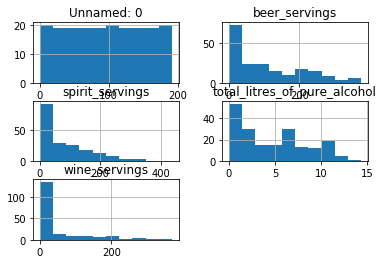

In [59]:
drinks.hist()

In [65]:
#Top beer drinking countries
drinks.groupby('country').max()
#drinks.sort_values(by ='beer_servings')

Unnamed: 0  beer_servings  spirit_servings  \
country                                                            
Afghanistan                    0              0                0   
Albania                        1             89              132   
Algeria                        2             25                0   
Andorra                        3            245              138   
Angola                         4            217               57   
Antigua & Barbuda              5            102              128   
Argentina                      6            193               25   
Armenia                        7             21              179   
Australia                      8            261               72   
Austria                        9            279               75   
Azerbaijan                    10             21               46   
Bahamas                       11            122              176   
Bahrain                       12             42               63   
Bangladesh                    13              0                0   
Barbados                      14            143              173   
Belarus                       15            142              373   
Belgium                       16            295               84   
Belize                        17            263              114   
Benin                         18             34                4   
Bhutan                        19             23                0   
Bolivia                       20            167               41   
Bosnia-Herzegovina            21             76              173   
Botswana                      22            173               35   
Brazil                        23            245              145   
Brunei                        24             31                2   
Bulgaria                      25            231              252   
Burkina Faso                  26             25                7   
Burundi                       27             88                0   
Cabo Verde                    29            144               56   
Cambodia                      30             57               65   
...                          ...            ...              ...   
Sudan                        162              8               13   
Suriname                     163            128              178   
Swaziland                    164             90                2   
Sweden                       165            152               60   
Switzerland                  166            185              100   
Syria                        167              5               35   
Tajikistan                   168              2               15   
Tanzania                     183             36                6   
Thailand                     169             99              258   
Timor-Leste                  171              1                1   
Togo                         172             36                2   
Tonga                        173             36               21   
Trinidad & Tobago            174            197              156   
Tunisia                      175             51                3   
Turkey                       176             51               22   
Turkmenistan                 177             19               71   
Tuvalu                       178              6               41   
USA                          184            249              158   
Uganda                       179             45                9   
Ukraine                      180            206              237   
United Arab Emirates         181             16              135   
United Kingdom               182            219              126   
Uruguay                      185            115               35   
Uzbekistan                   186             25              101   
Vanuatu                      187             21               18   
Venezuela                    188            333              100   
Vietnam   

In [71]:
#teacher solution
drinks.nlargest(1, 'beer_servings')[['country', 'beer_servings']]

country  beer_servings
117  Namibia            376

In [72]:
#additional options - 
drinks[drinks.beer_servings > 188].sort_values('beer_servings', ascending = False)

Unnamed: 0             country  beer_servings  spirit_servings  \
117         117             Namibia            376                3   
45           45      Czech Republic            361              170   
62           62               Gabon            347               98   
65           65             Germany            346              117   
98           98           Lithuania            343              244   
135         135              Poland            343              215   
188         188           Venezuela            333              100   
81           81             Ireland            313              118   
129         129               Palau            306               63   
140         140             Romania            297              122   
16           16             Belgium            295               84   
130         130              Panama            285              104   
160         160               Spain            284              157   
151         151              Serbia            283              131   
93           93              Latvia            281              216   
9             9             Austria            279               75   
156         156            Slovenia            270               51   
17           17              Belize            263              114   
60           60             Finland            263              133   
8             8           Australia            261               72   
120         120         Netherlands            251               88   
184         184                 USA            249              158   
141         141  Russian Federation            247              326   
23           23              Brazil            245              145   
3             3             Andorra            245              138   
32           32              Canada            240              122   
109         109              Mexico            238               68   
99           99          Luxembourg            236              133   
75           75             Hungary            234              215   
76           76             Iceland            233               61   
25           25            Bulgaria            231              252   
42           42             Croatia            230               87   
159         159        South Africa            225               76   
48           48             Denmark            224               81   
57           57             Estonia            224              194   
182         182      United Kingdom            219              126   
4             4              Angola            217               57   
132         132            Paraguay            213              117   
180         180             Ukraine            206              237   
121         121         New Zealand            203               79   
68           68             Grenada            199              438   
174         174   Trinidad & Tobago            197              156   
155         155            Slovakia            196              293   
143         143   St. Kitts & Nevis            194              205   
136         136            Portugal            194               67   
6             6           Argentina            193               25   
51           51  Dominican Republic            193              147   
44           44              Cyprus            192              154   

     wine_servings  total_litres_of_pure_alcohol continent  
117              1                           6.8        AF  
45             134                          11.8        EU  
62              59                           8.9        AF  
65             175                          11.3        EU  
98              56                          12.9        EU  
135             56                          10.9        EU  
188              3                           7.7        SA  
81             165                   

In [74]:
drinks.groupby('country').max().sort_values('beer_servings', ascending = False)

Unnamed: 0  beer_servings  spirit_servings  wine_servings  \
country                                                                         
Namibia                    117            376                3              1   
Czech Republic              45            361              170            134   
Gabon                       62            347               98             59   
Germany                     65            346              117            175   
Lithuania                   98            343              244             56   
Poland                     135            343              215             56   
Venezuela                  188            333              100              3   
Ireland                     81            313              118            165   
Palau                      129            306               63             23   
Romania                    140            297              122            167   
Belgium                     16            295               84            212   
Panama                     130            285              104             18   
Spain                      160            284              157            112   
Serbia                     151            283              131            127   
Latvia                      93            281              216             62   
Austria                      9            279               75            191   
Slovenia                   156            270               51            276   
Belize                      17            263              114              8   
Finland                     60            263              133             97   
Australia                    8            261               72            212   
Netherlands                120            251               88            190   
USA                        184            249              158             84   
Russian Federation         141            247              326             73   
Brazil                      23            245              145             16   
Andorra                      3            245              138            312   
Canada                      32            240              122            100   
Mexico                     109            238               68              5   
Luxembourg                  99            236              133            271   
Hungary                     75            234              215            185   
Iceland                     76            233               61             78   
...                        ...            ...              ...            ...   
Tuvalu                     178              6               41              9   
Yemen                      190              6                0              0   
Jordan                      86              6               21              1   
Egypt                       53              6                4              1   
Mali                       104              5                1              1   
Nepal                      119              5                6              0   
Indonesia                   78              5                1              0   
Myanmar                    116              5                1              0   
Syria                      167              5               35             16   
Niger                      123              3                2              1   
Tajikistan                 168              2               15              0   
Timor-Leste                171              1                1              4   
Haiti                       73              1              326              1   
Comoros                     38              1                3              1   
Qatar                      137              1               42              7   
Afghanistan                  0              0                0              0   
Somalia                    158              0      

In [80]:
#Bottom spirit serving continents
drinks.groupby('continent').sum().sort_values('spirit_servings')
#drinks.sort_values(by = 'spirit_servings')

Unnamed: 0  beer_servings  spirit_servings  wine_servings  \
continent                                                              
AF               4950           3258              866            862   
OC               1877           1435              935            570   
SA               1046           2101             1377            749   
AS               4796           1630             2677            399   
EU               4022           8720             5965           6400   

           total_litres_of_pure_alcohol  
continent                                
AF                                159.4  
OC                                 54.1  
SA                                 75.7  
AS                                 95.5  
EU                                387.8

In [78]:
drinks.groupby('continent').min().sort_values('spirit_servings')

Unnamed: 0      country  beer_servings  spirit_servings  \
continent                                                            
AF                  2      Algeria              0                0   
AS                  0  Afghanistan              0                0   
EU                  1      Albania              0                0   
OC                  8    Australia              0                0   
SA                  6    Argentina             93               25   

           wine_servings  total_litres_of_pure_alcohol  
continent                                               
AF                     0                           0.0  
AS                     0                           0.0  
EU                     0                           0.0  
OC                     0                           0.0  
SA                     1                           3.8

<Container object of 193 artists>

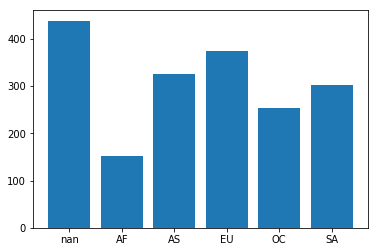

In [63]:
plt.bar(drinks.continent, drinks.spirit_servings)

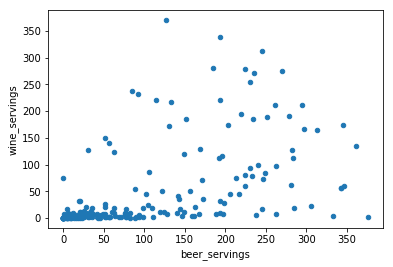

In [52]:
#Does it appear that as more wine is served, more beer is served?
drinks.plot.scatter(x = 'beer_servings',y = 'wine_servings')

<Container object of 193 artists>

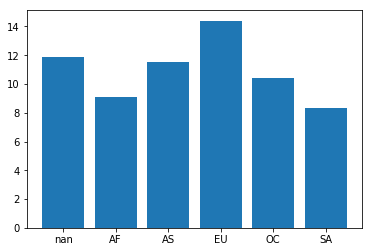

In [58]:
#What are the top total consumers by continent?
plt.bar(drinks.continent, drinks.total_litres_of_pure_alcohol)

In [83]:
drinks.sort_values(['continent', 'beer_servings'], ascending = False)

Unnamed: 0                       country  beer_servings  spirit_servings  \
188         188                     Venezuela            333              100   
23           23                        Brazil            245              145   
132         132                      Paraguay            213              117   
6             6                     Argentina            193               25   
20           20                       Bolivia            167               41   
133         133                          Peru            163              160   
52           52                       Ecuador            162               74   
37           37                      Colombia            159               76   
35           35                         Chile            130              124   
163         163                      Suriname            128              178   
185         185                       Uruguay            115               35   
72           72                        Guyana             93              302   
129         129                         Palau            306               63   
8             8                     Australia            261               72   
121         121                   New Zealand            203               79   
125         125                          Niue            188              200   
146         146                         Samoa            105               18   
59           59                          Fiji             77               35   
110         110                    Micronesia             62               50   
157         157               Solomon Islands             56               11   
118         118                         Nauru             49                0   
131         131              Papua New Guinea             44               39   
173         173                         Tonga             36               21   
89           89                      Kiribati             21               34   
187         187                       Vanuatu             21               18   
178         178                        Tuvalu              6               41   
40           40                  Cook Islands              0              254   
106         106              Marshall Islands              0                0   
45           45                Czech Republic            361              170   
65           65                       Germany            346              117   
..          ...                           ...            ...              ...   
53           53                         Egypt              6                4   
104         104                          Mali              5                1   
123         123                         Niger              3                2   
38           38                       Comoros              1                3   
97           97                         Libya              0                0   
107         107                    Mauritania              0                0   
158         158                       Somalia              0                0   
130         130                        Panama            285              104   
17           17                        Belize            263              114   
184         184                           USA            249              158   
32           32                        Canada            240              122   
109         109                        Mexico            238               68   
68           68                       Grenada            199              438   
174         174             Trinidad & Tobago            197              156   
143         143             St. Kitts & Nevis            194              205   
51           51            Dominican Republic            193              147   
144         144                     St. Lucia            171              315   
41           41                    C

In [84]:
drinks[drinks.continent == 'AS'].nlargest(1,'total_litres_of_pure_alcohol')

Unnamed: 0             country  beer_servings  spirit_servings  \
141         141  Russian Federation            247              326   

     wine_servings  total_litres_of_pure_alcohol continent  
141             73                          11.5        AS

In [85]:
for i in drinks.continent.unique():
    print (drinks[drinks.continent == i].nlargest(1,'beer_servings'))

     Unnamed: 0             country  beer_servings  spirit_servings  \
141         141  Russian Federation            247              326   

     wine_servings  total_litres_of_pure_alcohol continent  
141             73                          11.5        AS  
    Unnamed: 0         country  beer_servings  spirit_servings  wine_servings  \
45          45  Czech Republic            361              170            134   

    total_litres_of_pure_alcohol continent  
45                          11.8        EU  
     Unnamed: 0  country  beer_servings  spirit_servings  wine_servings  \
117         117  Namibia            376                3              1   

     total_litres_of_pure_alcohol continent  
117                           6.8        AF  
Empty DataFrame
Columns: [Unnamed: 0, country, beer_servings, spirit_servings, wine_servings, total_litres_of_pure_alcohol, continent]
Index: []
     Unnamed: 0    country  beer_servings  spirit_servings  wine_servings  \
188         188  

In [81]:
#why is there no north americas?? -- NA for North America would read as na and not be incldued
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
Unnamed: 0                      193 non-null int64
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
#notebook 8...